
# SMOTE-NC
Machine Learning with Imbalanced Data - Course

Extends SMOTE functionality to categorical variables.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from imblearn.over_sampling import SMOTENC

## Create data
We will create 2 classes, one majority and one minority, clearly separated to facilitate the demo.

In [5]:
# configuration options
blobs_random_seed = 42
centers = [(0, 0), (5, 5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# generate X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std,
)

# transform arrays to pd formats
X = pd.DataFrame(X, columns=['varA', 'varB'])
y = pd.Series(y)

# add categorical features
rng = np.random.RandomState(42)
X['varC'] = rng.choice(['A', 'B', 'C'], size=num_samples_total).astype(object)
X['varD'] = rng.choice(['Blue', 'Green', 'Red'], size=num_samples_total).astype(object)

# create an imbalanced X set
X = pd.concat([
    X[y==0],
    X[y==1].sample(200, random_state=42)
], axis=0)

y = y.loc[X.index]

# display size
X.shape, y.shape

((1000, 4), (1000,))

In [6]:
X.head()

,varA,varB,varC,varD
1,-0.958814,-1.330727,A,Blue
2,1.934003,1.866937,C,Blue
4,-0.975681,0.433013,A,Blue
6,-0.054335,1.015947,C,Green
7,0.071489,-0.015334,B,Blue


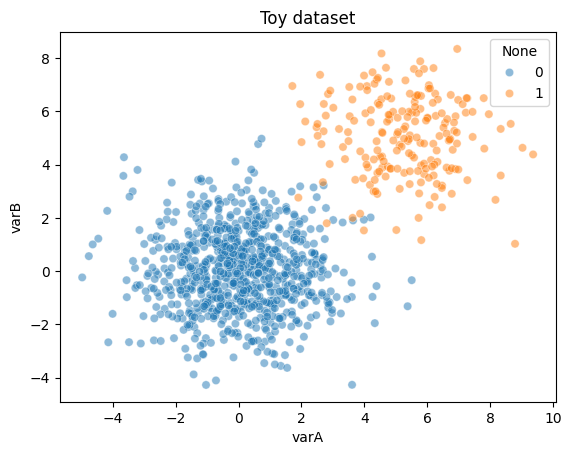

In [7]:
sns.scatterplot(
    data=X, x='varA', y='varB', hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

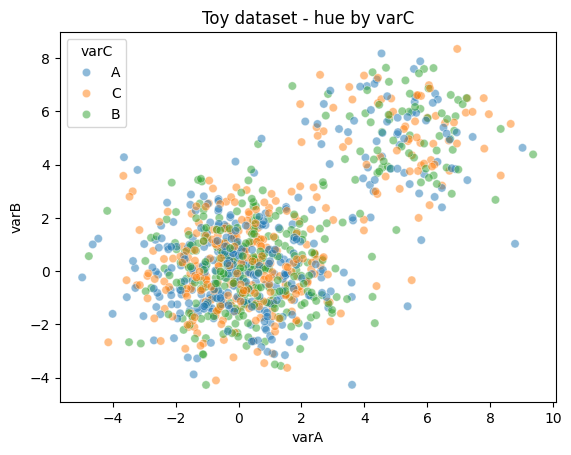

In [8]:
sns.scatterplot(
    data=X, x='varA', y='varB', hue='varC', alpha=0.5
)

plt.title('Toy dataset - hue by varC')
plt.show()

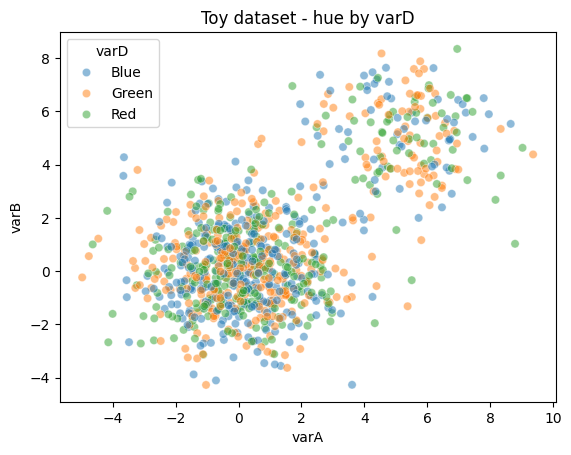

In [9]:
sns.scatterplot(
    data=X, x='varA', y='varB', hue='varD', alpha=0.5
)

plt.title('Toy dataset - hue by varD')
plt.show()

## SMOTE-NC

In [10]:
smnc = SMOTENC(
    sampling_strategy='auto',
    random_state=0,
    k_neighbors=5,
    categorical_features=[2, 3],    # indices of the columns of categorical variables
)

X_res, y_res = smnc.fit_resample(X, y)

In [11]:
# size of original data
X.shape, y.shape

((1000, 4), (1000,))

In [12]:
# size of oversampled data
X_res.shape, y_res.shape

((1600, 4), (1600,))

In [13]:
# number of minority class observations

y.value_counts(), y_res.value_counts()

(0    800
 1    200
 Name: count, dtype: int64,
 0    800
 1    800
 Name: count, dtype: int64)

In [14]:
X.tail()

,varA,varB,varC,varD
182,5.903868,4.787193,B,Red
1317,2.916607,6.770473,A,Blue
374,3.870933,4.494718,B,Red
1579,6.783551,2.901930,B,Blue
1128,4.548085,8.166645,A,Green


In [15]:
X_res.tail()

,varA,varB,varC,varD
1595,3.141937,4.384908,A,Blue
1596,5.553341,4.233335,C,Green
1597,4.186578,4.141739,A,Green
1598,5.725435,6.565300,C,Green
1599,8.902853,5.134027,B,Red


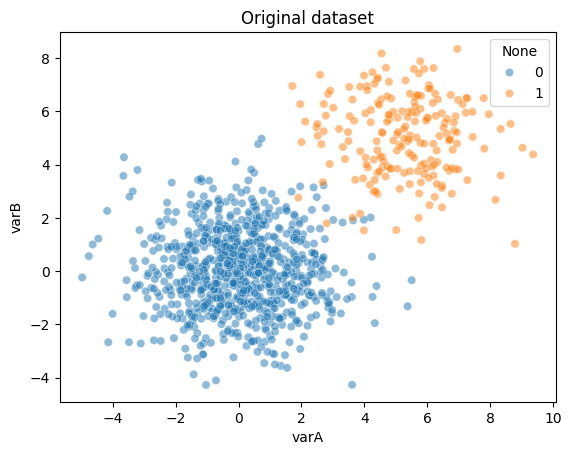

In [16]:
# plot of original data

sns.scatterplot(
    data=X, x="varA", y="varB", hue=y,alpha=0.5
)

plt.title('Original dataset')
plt.show()

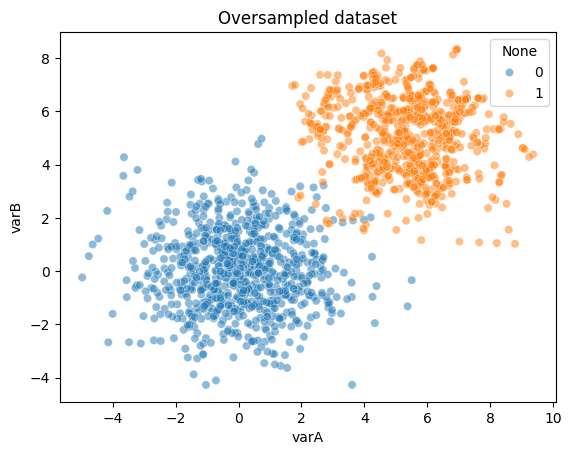

In [17]:
# plot of oversampled data

sns.scatterplot(
    data=X_res, x="varA", y="varB", hue=y_res, alpha=0.5
)

plt.title('Oversampled dataset')
plt.show()